## Solutions

## Lake Model Solutions

### Exercise 1

We begin by constructing the class containing the default parameters and assigning the
steady state values to x0

In [12]:
lm = LakeModel()
x0 = lm.rate_steady_state()
print(f"Initial Steady State: {x0}")

Initial Steady State: [0.08266806 0.91733194]


Initialize the simulation values

In [13]:
N0 = 100
T = 50

New legislation changes $ \lambda $ to $ 0.2 $

In [14]:
lm.lmda = 0.2

xbar = lm.rate_steady_state()  # new steady state
X_path = np.vstack(lm.simulate_stock_path(x0 * N0, T))
x_path = np.vstack(lm.simulate_rate_path(x0, T))
print(f"New Steady State: {xbar}")

New Steady State: [0.08266806 0.91733194]


Now plot stocks

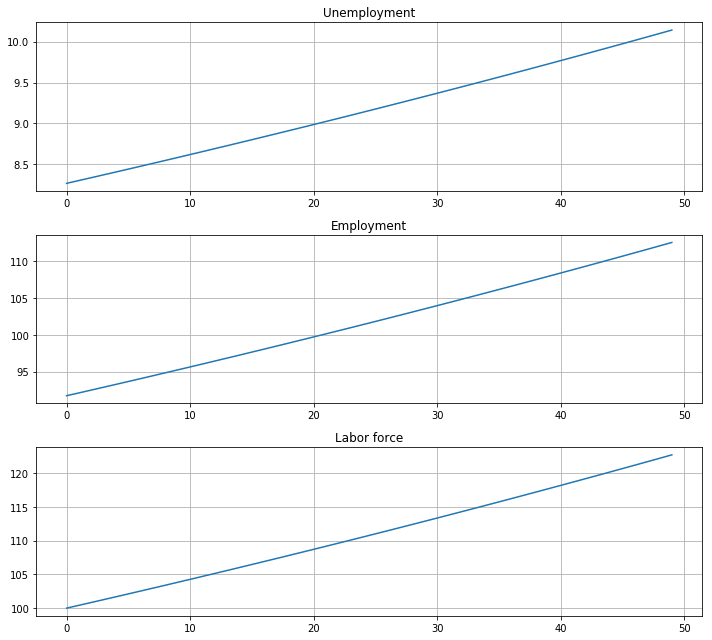

In [15]:
fig, axes = plt.subplots(3, 1, figsize=[10, 9])

axes[0].plot(X_path[:, 0])
axes[0].set_title('Unemployment')

axes[1].plot(X_path[:, 1])
axes[1].set_title('Employment')

axes[2].plot(X_path.sum(1))
axes[2].set_title('Labor force')

for ax in axes:
    ax.grid()

plt.tight_layout()
plt.show()

And how the rates evolve

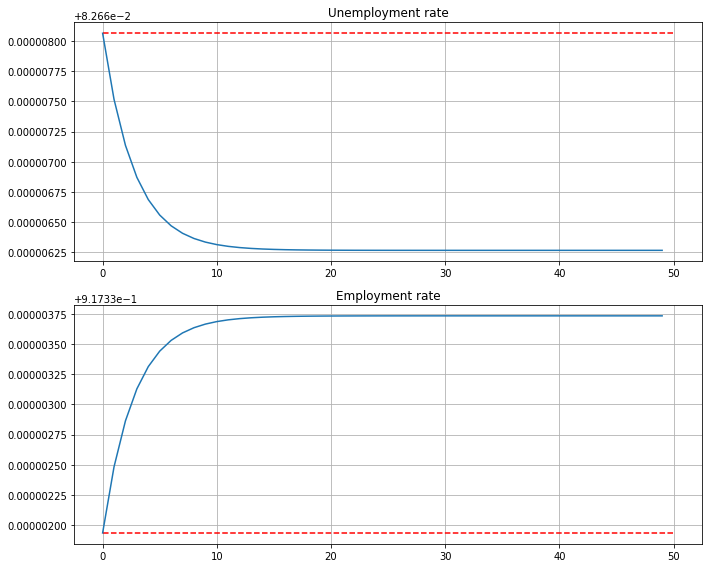

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

titles = ['Unemployment rate', 'Employment rate']

for i, title in enumerate(titles):
    axes[i].plot(x_path[:, i])
    axes[i].hlines(xbar[i], 0, T, 'r', '--')
    axes[i].set_title(title)
    axes[i].grid()

plt.tight_layout()
plt.show()

We see that it takes 20 periods for the economy to converge to its new
steady state levels

### Exercise 2

This next exercise has the economy experiencing a boom in entrances to
the labor market and then later returning to the original levels

For 20 periods the economy has a new entry rate into the labor market

Let’s start off at the baseline parameterization and record the steady
state

In [17]:
lm = LakeModel()
x0 = lm.rate_steady_state()

Here are the other parameters:

In [18]:
b_hat = 0.003
T_hat = 20

Let’s increase $ b $ to the new value and simulate for 20 periods

In [19]:
lm.b = b_hat
X_path1 = np.vstack(lm.simulate_stock_path(x0 * N0, T_hat))  # simulate stocks
x_path1 = np.vstack(lm.simulate_rate_path(x0, T_hat))        # simulate rates

Now we reset $ b $ to the original value and then, using the state
after 20 periods for the new initial conditions, we simulate for the
additional 30 periods

In [20]:
lm.b = 0.0124
X_path2 = np.vstack(lm.simulate_stock_path(X_path1[-1, :2], T-T_hat+1)) # simulate stocks
x_path2 = np.vstack(lm.simulate_rate_path(x_path1[-1, :2], T-T_hat+1))  # simulate rates

Finally we combine these two paths and plot

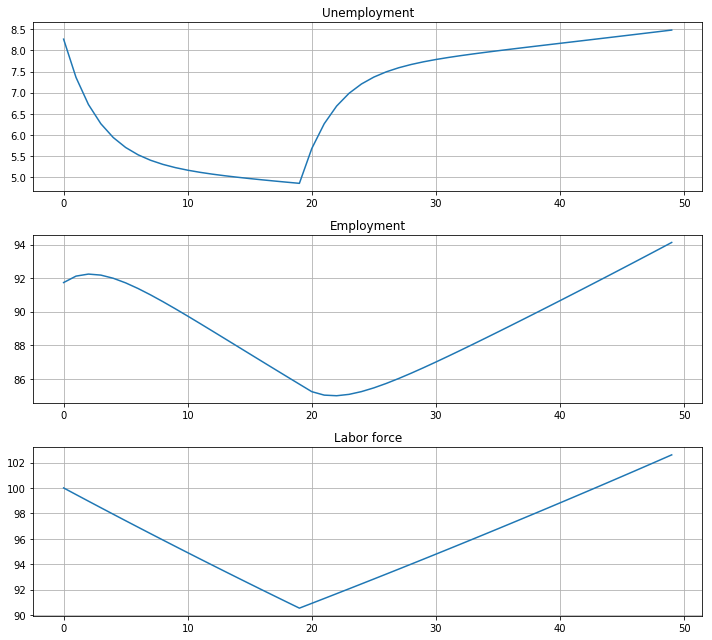

In [21]:
x_path = np.vstack([x_path1, x_path2[1:]]) # note [1:] to avoid doubling period 20
X_path = np.vstack([X_path1, X_path2[1:]])

fig, axes = plt.subplots(3, 1, figsize=[10, 9])

axes[0].plot(X_path[:, 0])
axes[0].set_title('Unemployment')

axes[1].plot(X_path[:, 1])
axes[1].set_title('Employment')

axes[2].plot(X_path.sum(1))
axes[2].set_title('Labor force')

for ax in axes:
    ax.grid()

plt.tight_layout()
plt.show()

And the rates

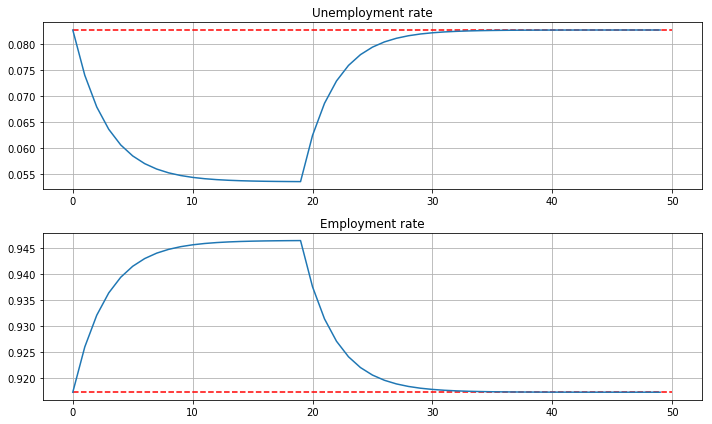

In [22]:
fig, axes = plt.subplots(2, 1, figsize=[10, 6])

titles = ['Unemployment rate', 'Employment rate']

for i, title in enumerate(titles):
    axes[i].plot(x_path[:, i])
    axes[i].hlines(x0[i], 0, T, 'r', '--')
    axes[i].set_title(title)
    axes[i].grid()

plt.tight_layout()
plt.show()